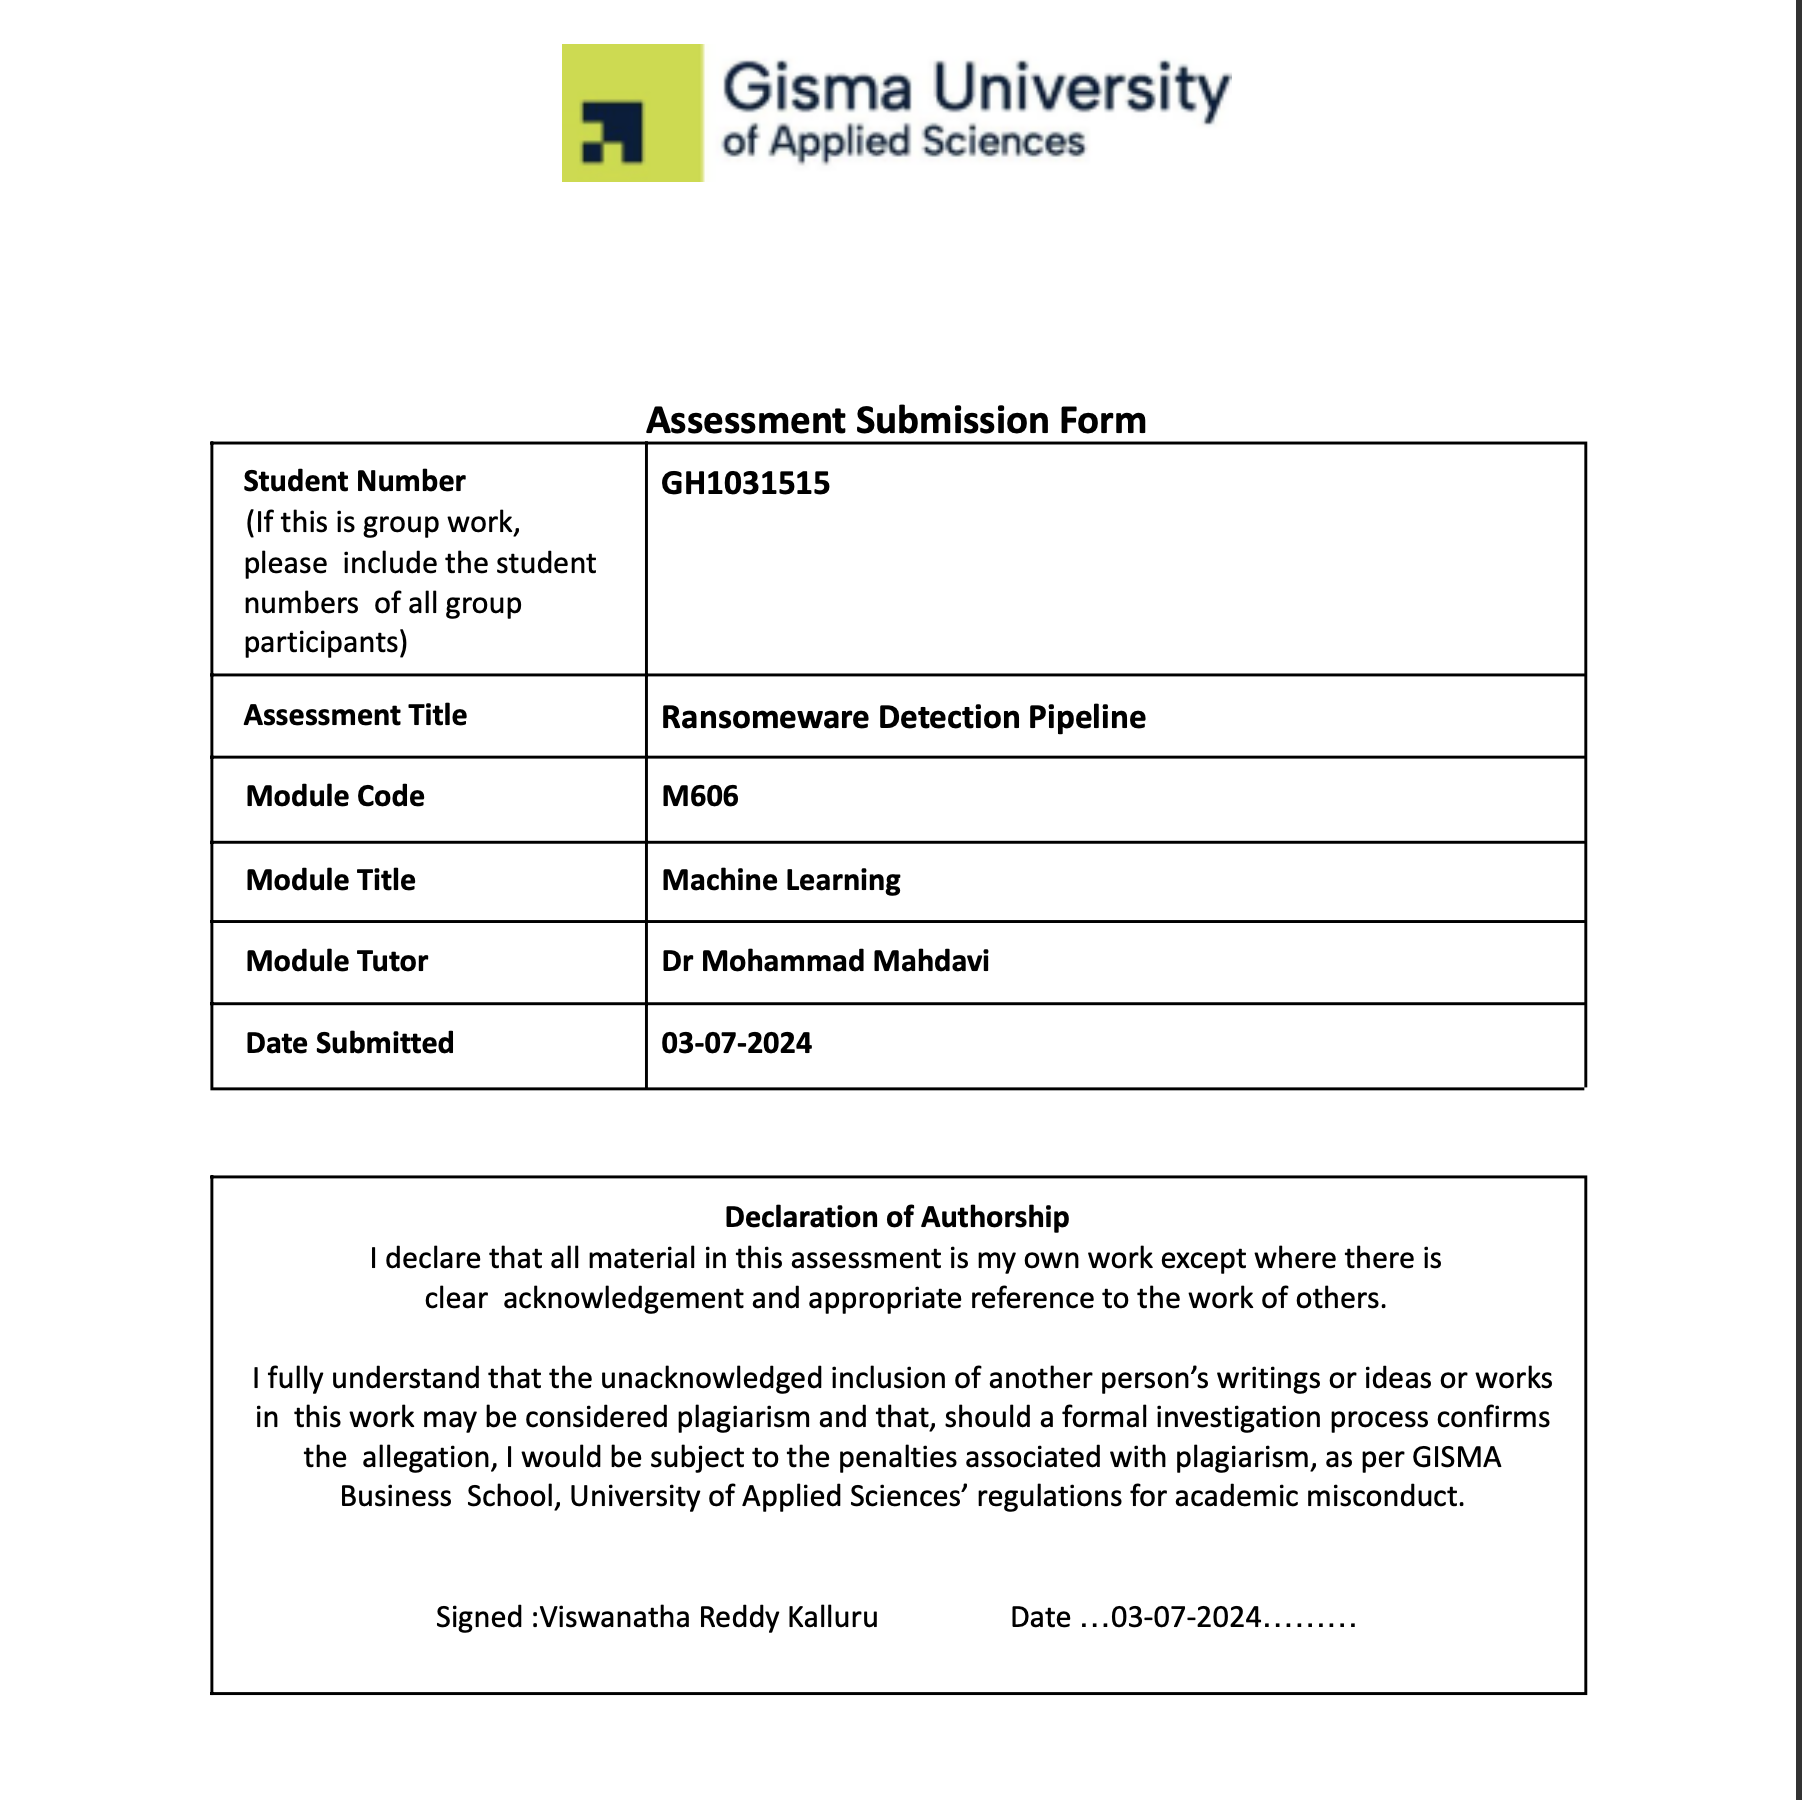

Github Link: https://github.com/Viswa657/Machine-Learning

Data_set Link : https://raw.githubusercontent.com/securycore/MLRD-Machine-Learning-Ransomware-Detection/master/data_file.csv


''RANSOMEWARE DETECTION'' Ransomeware attacks are a type of malicious attack which locks and encrypts the the victims devices, he/she can't decrypt the system there are only two ways left out way, one is to pay the 'ransome' to the attackers in the form of bitcoins the other way is protect our system from this kind of attacks by detecting the ransomeware affected file before installing into our systems. This is the major problem for majority of companies facing now a day by using this detection method they can save valuable company data from hackers.

FIRST STEP is to make sure to Import all the necessary libraries, later load the dataset from github or kaggel depends on where we took dataset to build the pipeline

Data Preprocessing: I believe this step is very crucial in any pipeline building here many will do the same mistake training the whole dataset which is a common mistake. Firstly, we need to split the dataset into two parts(training and testing) make sure the training data should be more than the testing data. Focus on the training data observe its nature and characteristics, From the training and testing you can split the features and targets accordingly.

Feature Engineering: categorical features and numericals can be encoded and normalised By using the One hot encoder and StandardScaler.

Selecting the Best Model and also Hyper_Parameter Tuning for better results: we can choose a machine learning model like(Decision Tree, Random Forest, KNN, SVM) and tweak with hyperpermaters is the best way to get good results.

Training and evaluating the best resultant Model:
Train and evaluate the model based on(Accuracy score, F1-score, recall, precision) after the result select best performing model in my case it is (Random Forest)







# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix


# **Load CSV File**

Loading libariers as well as load the dataset from the github url link and loaded into the pandas data frame, also printing the first few rows.

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/securycore/MLRD-Machine-Learning-Ransomware-Detection/master/data_file.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


Dropping the unnecessary feature columns like filename and md5hash from the dataset also removing any missing values by the help of dropna

In [ ]:
colus_to_drop = ['FileName', 'md5Hash'] # remove unnecessary columns
df = df.drop(columns=colus_to_drop)
df.drop_duplicates(keep="last", inplace=True)
df.dropna(inplace=True)
df.head(60)

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
5,34404,84,319776,10,10,374944,9208,312608,14,10,7,262144,16736,2072,0,1
7,34404,84,197888,10,10,229024,112,187208,14,10,7,262144,16736,1328,0,1
8,332,28,4240,0,4,0,0,4096,8,0,3,1048576,256,8799820,0,1
9,34404,84,64704,10,10,67632,404,57648,14,10,6,262144,16736,1072,0,1
10,332,28,59496,0,4,0,0,8192,48,0,3,1048576,34112,1064,0,1
11,34404,84,401484,10,6,418800,3784,405504,12,10,7,1048576,16736,1952,0,1
12,34404,84,56096,10,10,58544,108,42480,14,10,7,262144,16736,1016,0,1


# **Spilitting the Dataset**
With the help of scikit-learn by usin train_test_split function we cam split the datset into training as well as testing then training data later used for evaluating

In [ ]:
X = df.iloc[:, :-1]  # this Select all columns except the last one
y = df.iloc[:, -1]  # this Select only the last column

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The Actual Data Shape:", df.shape)
print("The Training Data Shape:", X_train.shape, y_train.shape)
print("The Testing Data Shape:", X_test.shape, y_test.shape)


The Actual Data Shape: (32256, 16)
The Training Data Shape: (25804, 15) (25804,)
The Testing Data Shape: (6452, 15) (6452,)


# **Data Exploration**

Here we performed a basic data exploration task like checking any sort of missing values in the data and print the values for cross verification

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64


# **Feature Engineering**
Here I used ColumnTransformer for preproccesing the dataset.

Example 1: Numeric Feature: the code applies to columns in the x-train only that has numerical values and stores it in numeric features it is done by StandardScaler removing mean and standardizes features

Example 2: Categorical features: similarly this encoder transforms categorical features intoa one-hot numeric array.


In [ ]:
# Preprocessing the pipeline
# Identify numeric, and categorical columns for encoding using the scaler and OneHot
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# **Training and evaluation**

Here I created a pipline for pre-processor and classifier, appplies onehot encoding and scaling for preprocessing and classifier make sures Machine learning model trained.

GridSearchCV to perform Exhaustive search on the hyperparameters which we provided, best paramters is used to retrieve the best reults from the grid search. Finally it return the best model in the grid search

Note: The Hyperparameters are significantly affect the overall model's performance, and adjusting them is a crucial step in the machine learning pipeline.

In [ ]:
# Functions for the training and evaluating models
def train_and_evaluate(Model, parameter_grid, X_train, y_train, X_test, y_test):
    pipelne = Pipeline(steps=[
        ('preprocessor', preprocessor),  # This Include the preprocessing step data
        ('classifier', Model)  # This Add the classifier to pipeline
    ])

    grid_search = GridSearchCV(pipelne, parameter_grid, cv=4, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_parameters = grid_search.best_params_
    best_result_model = grid_search.best_estimator_

    y_pred = best_result_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Best Hyperparameters: {best_parameters}")
    print(f"Accuracy: {accuracy:.4f}\n")

    return best_result_model

In [ ]:
rf_param_grid = {
    'classifier__n_estimators': [10, 100],    # Increase for potentially better performance (but slower)
    'classifier__criterion': ['entropy'],     # tried with 'gini' but entropy gave a good result
    'classifier__max_depth': [10, 20],        # I Started  with a wider range, then narrow down got good result
    'classifier__min_samples_split': [5, 10], # checked with different values Higher values can prevent overfitting
    'classifier__min_samples_leaf': [2, 4],    # Higher values can prevent overfitting
    'classifier__max_features': ['sqrt']         # 'sqrt' is often a good default from class discussion
}


In [ ]:
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # try with 'gini' and entropy to see which gives a good result
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Train and evaluate each model
print("Random_Forest Results:")
rf_model = train_and_evaluate(RandomForestClassifier(random_state=0), rf_param_grid, X_train, y_train, X_test, y_test)


print("The Decision Tree Results:")
dt_model = train_and_evaluate(DecisionTreeClassifier(random_state=101), dt_param_grid, X_train, y_train, X_test, y_test)

print("K-Nearest Neighbors Results:")
knn_model = train_and_evaluate(KNeighborsClassifier(), knn_param_grid, X_train, y_train, X_test, y_test)



Random_Forest Results:
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.9910

The Decision Tree Results:
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Accuracy: 0.9876

K-Nearest Neighbors Results:
Best Hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Accuracy: 0.9901



For building the pipline Several models were considered including [ (Decision Tree), RF(Random Forest) and KNN(K-Nearest Neighbors) ]. Hyperparameters were carefully choosen for each model to get the best out of it using Grid Search to do the optamization on their overall performance.


Decision Tree: achived the accuracy of 99.1%
Random Forest: achived accuracy of 98.7%
K-NN: achived accuracy of 99%


# **Best performing Model**

In [ ]:
# Evaluate the best model (Random Forest) on the test set
best_model = rf_model  # Assuming Random Forest performed the best
y_pred = best_model.predict(X_test)

print("The Best Model is (Random Forest) Testing Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


The Best Model (Random Forest) Testing Results:

Accuracy: 0.9910
Confusion Matrix:
[[2113   19]
 [  39 4281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2132
           1       1.00      0.99      0.99      4320

    accuracy                           0.99      6452
   macro avg       0.99      0.99      0.99      6452
weighted avg       0.99      0.99      0.99      6452



Here, we apply for the best model(Random Forest) in my case,on the test set and evaluation its performance using various metrics such as accuracy= 0.9910, precision= 0.98, recall=0.99, F1-score=0.99, and the confusion matrix

# **Conclusion and Discussion**



# **Strengths**

Here the major strength are data preprocessiong and tuning the hyperparameters: pipline handled missing data, standardizing the data and encoding the data effectively. I believe That is the main reason to get the high level of accuracy score in all almost all the model

# **Limitations**
The major limitation are :ransomeare techniques are evolving day by day many of the less skilled people also doing this kind of attacks with the help of Ransomeware as a sevice(Raas) so the attack is steeply increased with the trained dataset we can detect the many of the popular attack based on the signature if the attacker changed a bit and tweak the signature the pipkine which we built may not be effective

# **Conclusion**

Finally, this a our complete Ransomeware detection machine Learning pipline model with a very good accuracy score in detecting the major ransomeware attacks. further studeis and rigirous testing needed in the Adaptability of real world Implementations